MAE: 0.57
RMSE: 0.837


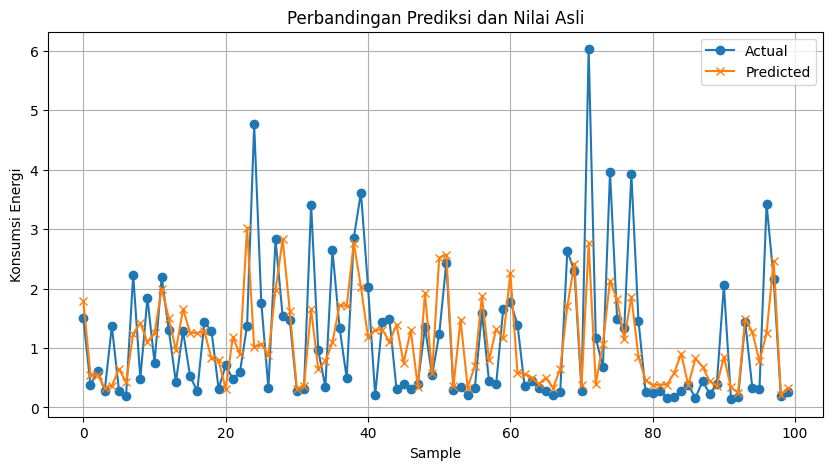

In [1]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 2. Load Dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/household_power_consumption.zip'
df = pd.read_csv(url, sep=';', low_memory=False, na_values='?')

# 3. Preprocessing
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.time
df.dropna(subset=['Global_active_power'], inplace=True)

# Gabungkan Date dan Time jadi satu datetime
df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))
df.set_index('Datetime', inplace=True)

# Ambil fitur waktu
df['Hour'] = df.index.hour
df['Day'] = df.index.day
df['Month'] = df.index.month

# Target dan fitur
X = df[['Hour', 'Day', 'Month']]
y = df['Global_active_power'].astype(float)

# 4. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Model Decision Tree
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# 6. Prediksi & Evaluasi
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", round(mae, 3))
print("RMSE:", round(rmse, 3))

# 7. Visualisasi
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_pred[:100], label='Predicted', marker='x')
plt.legend()
plt.title('Perbandingan Prediksi dan Nilai Asli')
plt.xlabel('Sample')
plt.ylabel('Konsumsi Energi')
plt.grid(True)
plt.show()
